# Bruno Lima Queiroz Santos

# Guia de operação analítica e numérica com vetores 3D (funções vetoriais) considerando números complexos no Python.

#### Guia para o cálculo com vetores (funções vetoriais) e números complexos a partir do Python com a "library" SymPy.

SUMÁRIO

### I) Introdução ao sympy, ferramenta para expressões simbólicas, analíticas.

a) Registro de variáveis simbólicas.

b) Cálculo de integral analiticamente.

c) Displaying results in LaTex. Exibindo resultados em LaTeX.

d) Conversão, em parte ou ao todo, expressões simbólicas para numéricas.


### II) Ferramentas para vetores 3D.

a) Registrando-se um sistema de coordenadas conveniente

b) Identificação das estruturas de um vetor ( função vetorial )

c) Exibindo-se o vínculo entre sistemas de coordenadas pai e filho

d) Declaração de um vetor ( função vetorial )

e) Operações vetoriais comuns


*   Produto interno (dot)
* 	Produto externo (cross)
*   Gradiente (gradient)
*   Rotacional (curl)
*   Divergente (divergence)

f) Exibição das componentes de um vetor (função vetorial)

g) Integral de uma função vetorial

h) Derivada de uma função vetorial

i) Obtenção do conjugado de uma função vetorial

j) Obtenção do módulo de uma função vetorial

k) Obtenção da parte real de uma função vetorial

l) Obtenção da parte imaginária de uma função vetorial

# Cabeçalho de código

In [1]:
#@title  { form-width: "400px" }
!pip install --upgrade pip
!pip install sympy --upgrade

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)
Requirement already up-to-date: sympy in /usr/local/lib/python3.6/dist-packages (1.6)


In [0]:
#@title  { form-width: "400px" }
import numpy as np
import sympy as sp
import sympy.vector as spv
import IPython.display as disp
from IPython.display import (Image, 
                            display, Latex)

# I) Introdução ao *SymPy*, ferramenta para expressões simbólicas e analíticas.

#### a) Registrando-se um sistema de coordenadas conveniente.

In [0]:
#@title  { form-width: "400px" }

x,y = sp.symbols('x,y',real=True)
# default é valor complexo

A unidade imaginária é referenciada numericamente por `1j`. Para o `sympy`, o formato é `1.0*I`

#### b) Cálculo de integral analiticamente

In [4]:
#@title  { form-width: "400px" }

# integral indefinida
result = sp.integrate(x**2+2j*x, x)
print(result) # <- Formato string
print("\n\n")
result

x**3/3 + 1.0*I*x**2





x**3/3 + 1.0*I*x**2

In [5]:
#@title  { form-width: "400px" }

# integral definida
result = sp.integrate(x**2+2j*x, (x,0,1))
print(result) # <- Formato string
print("\n\n")
result

1/3 + 1.0*I





1/3 + 1.0*I

In [6]:
#@title  { form-width: "400px" }

# integral definida
result = sp.integrate(x**2+2j*x, (x,0,y))
print(result) # <- Formato string
print("\n\n")
result

y**3/3 + 1.0*I*y**2





y**3/3 + 1.0*I*y**2

Pode-se ainda tomar cuidado com expressões do tipo `piecewise`. Pode-se simplificá-las manualmente assinalando `False` para todas as condições falsas. Por exemplo:

In [7]:
#@title  { form-width: "400px" }

RESULT=result
α=sp.symbols('α')
result=sp.cos(α*sp.pi*x)
result

cos(pi*x*α)

In [8]:
#@title  { form-width: "400px" }

result=sp.integrate(result,(x,-1,1))
print(result)
print("\n\n")
result

Piecewise((2*sin(pi*α)/(pi*α), (α > -oo) & (α < oo) & Ne(α, 0)), (2, True))





Piecewise((2*sin(pi*α)/(pi*α), (α > -oo) & (α < oo) & Ne(α, 0)), (2, True))

Pode-se usar como apoio um editor de texto para auxiliar as edições das strings para o cálculo. Considerando o caso de interesse ( não otherwise):

In [9]:
#@title  { form-width: "400px" }

from sympy import (Piecewise,sin,pi,cos,
                  oo,Ne)
Piecewise((2*sin(pi*α)/(pi*α), True), 
          (2, False))

2*sin(pi*α)/(pi*α)

#### c) "Displaying results in LaTex". Exibindo resultados em LaTeX.

In [0]:
#@title  { form-width: "400px" }

def dlatex(arg):
  display(Latex(arg))
  return None

In [11]:
#@title  { form-width: "400px" }

result=x*1j+y**2
print("exibindo código LaTeX: " 
      + sp.latex(result))
# + é um operador utilizado para 
# a concatenação de strings

exibindo código LaTeX: 1.0 i x + y^{2}


In [12]:
#@title  { form-width: "400px" }

A=r"exibindo \;código \; \mathbf{LaTeX}: "
# "Note the use of Latex-style \\ newlines,
# and the r'' string,
# which will take the backslashes as 
# literal backslashes 
# and not see them as escape characters."
# -sebas
A=A+sp.latex(result)
dlatex(A)
print("\n")
dlatex(A)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

De acordo com [[1](https://stackoverflow.com/questions/20979993/how-to-pretty-print-in-ipython-notebook-via-sympy),[2](https://stackoverflow.com/questions/48422762/is-it-possible-to-show-print-output-as-latex-in-jupyter-notebook)], *acessados em 07/06/2020*.

#### d) Conversão, em parte ou ao todo, de expressões simbólicas para numéricas.

In [13]:
#@title  { form-width: "400px" }

result=result*x
dlatex(sp.latex(result))
print("\n\n")


result_num = result.subs([
                            (x,1),
                            (y,x)
                         ])

A=r"substituindo-se \; (x \rightarrow 1\;,\;"
A=A+r"y \rightarrow x)\;:\;"
A=A+sp.latex(result_num)
dlatex(A)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Obs: Caso o formato final seja totalmente numérico, deve-se converter o tipo por meio da função `complex()`.

In [14]:
#@title  { form-width: "400px" }

result_num = complex(result.subs([
                            (x,1),
                            (y,1.0)
                         ]))
result_num

(1+1j)

Embora haja a ferramenta `lambdify` para a transformação de expressão simbólica em função, é preferível utilizar *List comprehension* com a ferramenta `subs` para se conseguir esse efeito sobre vetores inclusive.

In [15]:
#@title  { form-width: "400px" }

dlatex(sp.latex(result))
print("\n\n")
result_num = result.subs([
                            (x,1),
                            (y,x)
                         ])
i=np.array([1.0,2.0])
j=[x,1.0]
results_new=[
                result.subs([
                  (x,i_v),
                  (y,j_v)         
                ]) for i_v in i for j_v in j
             ]
# As iterações de j_v estão dentro 
# das iterações de i_v.

print(results_new)
print("\n\n")

A=r"substituições \;:\;"
A=A+sp.latex(results_new)

dlatex(A)

<IPython.core.display.Latex object>




[1.0*x**2 + 1.0*I, 1.0 + 1.0*I, 2.0*x**2 + 4.0*I, 2.0 + 4.0*I]





<IPython.core.display.Latex object>

Para mais informações, visite [Documentação SymPy](https://docs.sympy.org/latest/index.html)


# II) Ferramentas para vetores 3D

#### a) Declarando-se um sistema de coordenadas conveniente

Como indicado por [[3](https://stackoverflow.com/questions/61100589/is-there-a-way-of-working-in-spherical-coordinates-in-sympy)] e se vê na documentação [[4](https://docs.sympy.org/latest/modules/vector/basics.html#coordinate-systems-and-vectors)], *acessados em 07/06/2020*, o módulo `vector` da library `sympy` é capaz de lidar com sistemas de coordenadas curvilíneas também, por exemplo "*spherical*".

Observando a seção principal do módulo [[5](https://docs.sympy.org/latest/modules/vector/index.html)] e, depois [[6](https://docs.sympy.org/latest/modules/vector/api/classes.html#coordsys3d)], inserindo a palvra-chave "*spherical*" no mecanismo de busca `CTRL + F`, obteve-se rapidamente um exemplo de que a transformação é expressa por meio do parâmetro `transformation`. 

Para conhecer as outras transformações automaticamente disponibilizadas, além do `default`, que é um sistema cartesiano, analisou-se o código fonte de `CoordSys3D`, vide [source(CoordSys3D)](https://github.com/sympy/sympy/blob/b92b971eb4712e9ccfbdae993c42b3563ce8f86d/sympy/vector/coordsysrect.py#L26-L1039), *acessado em 07/06/2020*, buscando-se o objeto de interesse (as demais formas de transformação) por meio da palavra chave *spherical*, uma forma de transformação, no mecanismo de busca `CTRL + F`. A suposição feita era que as outras formas de transformação foram definidas nas proximades de onde essa transformação foi definida.

In [0]:
#@title  { form-width: "400px" }

#r=spv.CoordSys3D('r',transformation='spherical', 
#variable_names=("r", "θ","ϕ"))

r_cart=spv.CoordSys3D('r')
a=r_cart.create_new('a',
                    transformation='spherical', 
                    variable_names=("r", "θ","φ"),
                    vector_names=("r_d", "θ_d",
                                  "φ_d")
                   )



# Utilizar-se-ão letras minúsculas como 
# referência a variáveis e 
# incógnitas com valor real. 
# Por outro lado, utilizar-se-ão  letras 
# MAIÚSCULAS como referência a variáveis 
# e constantes com valor COMPLEXO.

É preciso ilustrar o estabelecimento da correspondência entre as variáveis e as estruturas dos vetores. No caso atual, `a` é a referência ao sistema 3D de coordenadas esféricas criado a partir de um sistema 3D cartesiano.

#### b) Identificação das estruturas de um vetor ( função vetorial)


Abaixo ilustrou-se o vínculo entre os sistemas 3D.

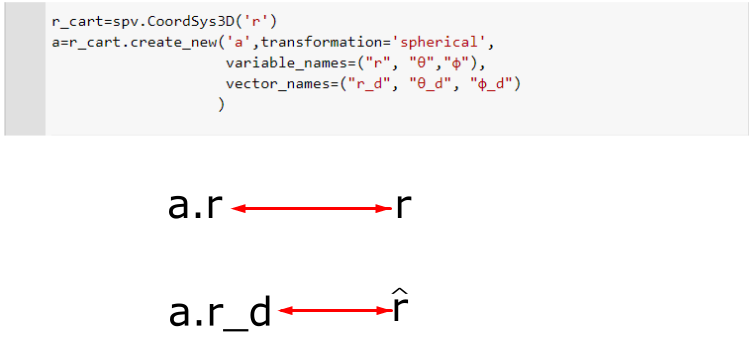

In [17]:
#@title  { form-width: "400px" }

from IPython.display import Image, display
display(Image("Screenshot_4.png"))

#### c) Exibindo-se o vínculo entre sistemas de coordenadas pai e filho

In [18]:
#@title  { form-width: "400px" }

print("(x(r,θ,φ),y(r,θ,φ),z(r,θ,φ))=",
      a.transformation_to_parent())
print("\n\n")
print("(r(x,y,z),θ(x,y,z),φ(x,y,z))=" ,
      a.transformation_from_parent())

print("\n\n")

A=r"(\;x(r,θ,\phi),\;y(r,θ,\phi),"
A=A+r"\;z(r,θ,\phi)\;)="
B=sp.latex(
      a.transformation_to_parent()
    )
C=A+B
dlatex(C)

print("\n\n")

A=r"(\;r(x,y,z), \;\;θ(x,y,z),"
A=A+r"\;\;\phi(x,y,z)\;)="
B=sp.latex(
      a.transformation_from_parent()
    )
C=A+B

print("Analogamente:\n\n")

dlatex(C)

(x(r,θ,φ),y(r,θ,φ),z(r,θ,φ))= (a.r*sin(a.θ)*cos(a.φ), a.r*sin(a.θ)*sin(a.φ), a.r*cos(a.θ))



(r(x,y,z),θ(x,y,z),φ(x,y,z))= (sqrt(r.x**2 + r.y**2 + r.z**2), acos(r.z/sqrt(r.x**2 + r.y**2 + r.z**2)), atan2(r.y, r.x))





<IPython.core.display.Latex object>




Analogamente:




<IPython.core.display.Latex object>

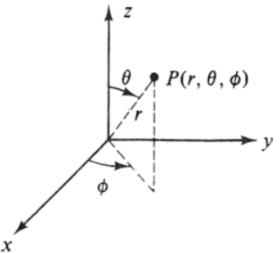

In [19]:
#@title  { form-width: "400px" }
display(Image("Screenshot_2.png"))

[[Fonte 1](https://www.google.com/imgres?imgurl=https%3A%2F%2Fkeisan.casio.com%2Fkeisan%2Flib%2Freal%2Fsystem%2F2006%2F1359533867%2Fspherical%2520polar2.gif&imgrefurl=https%3A%2F%2Fkeisan.casio.com%2Fexec%2Fsystem%2F1359533867&tbnid=9UdY7pPSJU8aNM&vet=12ahUKEwie5_TAp_DpAhVuK7kGHTd6DrIQMygAegUIARDRAQ..i&docid=vwyziJTwtosv_M&w=252&h=198&q=spherical%20coordinates&hl=en&ved=2ahUKEwie5_TAp_DpAhVuK7kGHTd6DrIQMygAegUIARDRAQ)]

#### d) Declaração de um vetor ( função vetorial )

**OBS**: Letras minúsculas serão reservadas a vetores reais e letras MAIÚSCULAS serão reservadas a vetores com números complexos em suas componentes.

Conforme a identificação das estruturas de um vetor, declarar-se-á o vetor :

$$\mathbf{k}= r\hat{r}+r\sin(\theta)\hat{\theta}+ r\cos(φ)\hat{φ}$$


no sistema de referência *a*.


In [21]:
#@title  { form-width: "400px" }

k = (a.r)*a.r_d + (a.r*sp.sin(a.θ))*a.θ_d
k = k + (a.r*sp.cos(a.φ))*a.φ_d

print(k)
print("\n")

string=r"\mathbf{k}\;=\;"
string=string+sp.latex(k)
dlatex(string)

a.r*a.r_d + (a.r*sin(a.θ))*a.θ_d + (a.r*cos(a.φ))*a.φ_d




<IPython.core.display.Latex object>

Pode-ser declarar também:

$$\mathbf{K}= ir\hat{r}+r\sin(\theta)\hat{\theta}+ r\cos(φ)\hat{φ}$$

Isso pode ser feito utilizando-se as operações de soma e subtração com os operadores `+` e `-`

In [22]:
#@title  { form-width: "400px" }
K=k-(a.r)*a.r_d 
K=K + (sp.I*a.r)*a.r_d

print("K = ",end="")
print(K)
print("\n")

string=r"\mathbf{K}\;=\;"
string=string+sp.latex(K)
dlatex(string)

K = a.r*I*a.r_d + (a.r*sin(a.θ))*a.θ_d + (a.r*cos(a.φ))*a.φ_d




<IPython.core.display.Latex object>

#### e) Operações vetorais comuns 

Como já se sabe, a soma e subtração de vetores podem ser realizadas pelos operadores `+` e `-`.  Além disso, essa seção foca em:


*   Produto interno (.dot)
*   Produto externo (.cross)
*   Gradiente (gradient)
*   Rotacional (curl)
*   Divergente (divergence)



Para mais informações, consulte [Vector API](https://docs.sympy.org/latest/modules/vector/index.html), *acesso em 08/06/2020*.

Exemplos básicos abaixo.


In [23]:
# PRODUTO INTERNO 
k.dot(K)

a.r**2*sin(a.θ)**2 + a.r**2*cos(a.φ)**2 + a.r**2*I

In [24]:
# PRODUTO VETORIAL
k.cross(K)

(-a.r**2*cos(a.φ) + a.r**2*I*cos(a.φ))*a.θ_d + (a.r**2*sin(a.θ) - a.r**2*I*sin(a.θ))*a.φ_d

In [25]:
#@title  { form-width: "400px" }


A=r"\mathbf{k} \cdot \mathbf{K} \;=\;"

# PRODUTO INTERNO
#k.dot(k)

A=A+sp.latex(k.dot(K))
dlatex(A)
print("\n\n")

A=r"\mathbf{k} \times \mathbf{K} \;=\;"

# PRODUTO EXTERNO
#k.cross(k)

A=A+sp.latex(k.cross(K))
dlatex(A)
print("\n\n")

print(spv.gradient(a.φ*a.r))
print("\n\n")
dlatex(
    sp.latex(
        spv.gradient(a.θ*a.r)
    )
  )

k=a.θ*a.r_d
print("\n\n")
dlatex(
    sp.latex(
        spv.curl(k)
    )
  )

k=a.φ**2*a.φ_d

print("\n\n")

A=r"k="
A=A+sp.latex(k)





dlatex(A)

print("\n\n")

A=r"curl("
A=A+sp.latex(k)
A=A+r")   =    "
A=A+sp.latex(spv.curl(k))


dlatex(A)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>




a.φ*a.r_d + (1/sin(a.θ))*a.φ_d





<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### f) Exbição das componentes de um vetor (função vetorial) 


In [26]:
#@title  { form-width: "400px" }

# return das componentes do vetor na forma de dicionário
print(k.components)
print("\n\n")
dlatex(sp.latex(k.components))

{a.φ_d: a.φ**2}





<IPython.core.display.Latex object>

#### g) Integral de uma função vetorial

In [27]:
#@title  { form-width: "400px" }

# integral indefinida simples
sp.simplify(sp.integrate(k,(a.φ)))

a.φ**3/3*a.φ_d

Note que foi omitida a constante de integração. Portanto, pode ser mais conveniente obter  integrais indefinidas por integração definida com a partir de um valor incógnita até o valor variável final.

In [28]:
#@title  { form-width: "400px" }

# integral indefinida simples 
c=sp.symbols('c',real=True)
sp.simplify(sp.integrate(k,(a.φ,c,a.φ)))

(a.φ**3/3 - c**3/3)*a.φ_d

**OBS**: é recomendado o uso da função `sp.simplify()` para forçar a exibição do resultado do cálculo da integral.

A consequência disso é a necessidade de realizar **integrais múltiplas** por meio de repetidas execuções de integrais simples, cada uma utilizando a função `sp.simplify`.

In [29]:
#@title  { form-width: "400px" }

# integral definida dupla
sp.simplify(sp.integrate(k,(a.φ,0,a.φ),(a.r,0,x)))

# Realizada da esquerda para a direita

a.φ**3*x/3*a.φ_d

In [30]:
#@title  { form-width: "400px" }

def integrate_v(k,args):
  result=sp.simplify(sp.integrate(k,args))
  return result

integrate_v(
    integrate_v(K,(a.φ,0,a.φ)),(a.φ,0,a.φ)
)

a.r*a.φ**2*I/2*a.r_d + (a.r*a.φ**2*sin(a.θ)/2)*a.θ_d + (a.r*(1 - cos(a.φ)))*a.φ_d

In [31]:
#@title  { form-width: "400px" }
sp.simplify(sp.integrate(K,(a.φ,0,a.φ),(a.r,0,x)))

a.φ*I*x**2/2*a.r_d + (a.φ*x**2*sin(a.θ)/2)*a.θ_d + (Integral(a.r*cos(a.φ), (a.φ, 0, a.φ), (a.r, 0, x)))*a.φ_d

#### h) Derivada de um vetor ( uma função vetorial )

Não há necessidade de se preocupar com o cômputo de uma operação válida.
Contudo, **é importante** observar se as componentes do vetor são deriváveis *no caso de uma derivada em relação a uma variável complexa*.


In [32]:
#@title  { form-width: "400px" }
K=K*a.φ

dlatex(sp.latex(K))

<IPython.core.display.Latex object>

In [33]:
#@title  { form-width: "400px" }
A=r"d(\frac{d\mathbf{K}}{dr})/ dφ\;=\;"
A=A+sp.latex(
    sp.diff(K,a.r,a.φ)
    )
dlatex(A)

<IPython.core.display.Latex object>

In [34]:
#@title  { form-width: "400px" }
sp.diff(K,a.r,a.φ)

I*a.r_d + (sin(a.θ))*a.θ_d + (-a.φ*sin(a.φ) + cos(a.φ))*a.φ_d

####i) Obtenção do conjugado de uma função vetorial

A ferramenta `sp.conjugate()` requer cuidado na especificação do tipo de valor de cada símbolo no ato de sua definição, especialmente se `real=True`, pois o *default* é `real=False`. Assim, o resultado da conjugação sobre a variável será simplificado. O incoveniente é que a ferramenta não lida muito bem com as estruturas do vetor. Nesse sentido, é útil *transformar a estrutura de vetor para o formato matricial, depois substituir os símbolos vetoriais remanescentes*, em seguida aplicar a conjugação e finalmente desfazer o processo inverso ao destacado em itálico.

Uma estratégia análoga deve ser usada para extração da parte real e imaginária de um vetor.

O resultado dessas operações reconstruídas é a criação de uma função que tem como resultado o módulo do vetor, pois para números complexos a ferramenta `.magnitude()` não é consistente.

In [0]:
#@title  { form-width: "400px" }
# ====================================== #
# Caixa de configurações dependem do 
# sistema de coordenadas adotado e
# do valor das variáveis.

# Assinalando variáveis reais !
r,θ,φ=sp.symbols('r,θ,φ', real=True)

# substituição direta (esquerda --> direita)
subs_a=[(a.r,r),
        (a.θ,θ),
        (a.φ,φ)]

# substituição reversa ( esquerda --> direita)
subs_a_rev=[(r,a.r),
        (θ,a.θ),
        (φ,a.φ)]
a_subs=[subs_a,subs_a_rev,a]
# ====================================== #

#def conjugate_v(D,[subs_a,subs_a_rev,a]):
def conjugate_v(D,a_subs):
  # D é o vetor a ser conjugado.
  # subs_a é o assinalamento de variáveis reais.
  # subs_a é a reatribuição dos objetos
  # a é o sistema de referência.
  D_conj=D.to_matrix(a_subs[2])

  # ---------------------------------------- #
  D_conj=sp.conjugate(D_conj.subs(a_subs[0]))
  # ---------------------------------------- #

  D_conj=spv.matrix_to_vector(D_conj,a_subs[2])
  D_conj=D_conj.subs(a_subs[1])

  return D_conj

In [36]:
#@title  { form-width: "400px" }

################################

K.dot(conjugate_v(K,a_subs))

################################

a.r**2*a.φ**2*sin(a.θ)**2 + a.r**2*a.φ**2*cos(a.φ)**2 + a.r**2*a.φ**2

In [37]:
#@title  { form-width: "400px" }
(K.magnitude())**2

a.r**2*a.φ**2*sin(a.θ)**2 + a.r**2*a.φ**2*cos(a.φ)**2 - a.r**2*a.φ**2

####j) Obtenção do módulo de uma função vetorial

In [0]:
#@title  { form-width: "400px" }
# ====================================== #
# Caixa de configurações dependem do 
# sistema de coordenadas adotado e
# do valor das variáveis.

# Assinalando variáveis reais !
r,θ,φ=sp.symbols('r,θ,φ', real=True)

# substituição direta (esquerda --> direita)
subs_a=[(a.r,r),
        (a.θ,θ),
        (a.φ,φ)]

# substituição reversa ( esquerda --> direita)
subs_a_rev=[(r,a.r),
        (θ,a.θ),
        (φ,a.φ)]
a_subs=[subs_a,subs_a_rev,a]
# ====================================== #

def magnitude_v(D,a_subs):
  D_magnitude=sp.sqrt(D.dot(conjugate_v(D,a_subs)))
  return(D_magnitude)

In [39]:
#@title  { form-width: "400px" }

magnitude_v(K,a_subs)

sqrt(a.r**2*a.φ**2*sin(a.θ)**2 + a.r**2*a.φ**2*cos(a.φ)**2 + a.r**2*a.φ**2)

####k) Obtenção da parte real de uma função vetorial

In [0]:
#@title  { form-width: "400px" }
# ====================================== #
# Caixa de configurações dependem do 
# sistema de coordenadas adotado e
# do valor das variáveis.

# Assinalando variáveis reais !
r,θ,φ=sp.symbols('r,θ,φ', real=True)

# substituição direta (esquerda --> direita)
subs_a=[(a.r,r),
        (a.θ,θ),
        (a.φ,φ)]

# substituição reversa ( esquerda --> direita)
subs_a_rev=[(r,a.r),
        (θ,a.θ),
        (φ,a.φ)]
a_subs=[subs_a,subs_a_rev,a]
# ====================================== #

def re_v(D,a_subs):
  # D é o vetor a ser conjugado.
  # subs_a é o assinalamento de variáveis reais.
  # subs_a é a reatribuição dos objetos
  # a é o sistema de referência.
  D=D.to_matrix(a_subs[2]) # Não é o objeto em D que é atribuído.

  # ---------------------------------------- #
  D=sp.re(D.subs(a_subs[0]))
  # ---------------------------------------- #

  D=spv.matrix_to_vector(D,a_subs[2])
  D=D.subs(a_subs[1])

  return D 

In [41]:
re_v(K,a_subs)

(a.r*a.φ*sin(a.θ))*a.θ_d + (a.r*a.φ*cos(a.φ))*a.φ_d

####l) Obtenção da parte imaginária de uma função vetorial

In [0]:
#@title  { form-width: "400px" }
# ====================================== #
# Caixa de configurações dependem do 
# sistema de coordenadas adotado e
# do valor das variáveis.

# Assinalando variáveis reais !
r,θ,φ=sp.symbols('r,θ,φ', real=True)

# substituição direta (esquerda --> direita)
subs_a=[(a.r,r),
        (a.θ,θ),
        (a.φ,φ)]

# substituição reversa ( esquerda --> direita)
subs_a_rev=[(r,a.r),
        (θ,a.θ),
        (φ,a.φ)]
a_subs=[subs_a,subs_a_rev,a]
# ====================================== #

def im_v(D,a_subs):
  # D é o vetor a ser conjugado.
  # subs_a é o assinalamento de variáveis reais.
  # subs_a é a reatribuição dos objetos
  # a é o sistema de referência.
  D=D.to_matrix(a_subs[2]) # Não é o objeto em D que é atribuído.

  # ---------------------------------------- #
  D=sp.im(D.subs(a_subs[0]))
  # ---------------------------------------- #

  D=spv.matrix_to_vector(D,a_subs[2])
  D=D.subs(a_subs[1])

  return D 

In [43]:
im_v(K,a_subs)

a.r*a.φ*a.r_d